In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_excel('credits.xlsx')

In [26]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54288 entries, 0 to 54287
Data columns (total 14 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Дата перевода на D365                                          38860 non-null  datetime64[ns]
 1   Уровень данных                                                 54288 non-null  object        
 2   ТД                                                             54288 non-null  object        
 3   Филиал                                                         54288 non-null  object        
 4   Группа                                                         54288 non-null  object        
 5   Код объекта                                                    54288 non-null  object        
 6   Город                                                          54288 non-null  object        


In [28]:
df.head()

,Дата перевода на D365,Уровень данных,ТД,Филиал,Группа,Код объекта,Город,Наименование объекта,"План по выручке, руб","План по выручке, руб.1","Выручка объект\n+\nЕ-ком, руб","Бонусы Спасибо, руб","Факт продаж (чеки с кредитом POSCredit, Paylate, Мокка), руб.",Дата
0,2023-11-23,5. Объект,Сибирь,Новокузнецк,Новокузнецк (группа 1),3-04-039,Киселевск,"Киселевск, Ленина, 41",NaN,100633.501922,22555.0,268.0,0.0,2023-10-01
1,NaT,5. Объект,Сибирь,Новокузнецк,Новокузнецк (группа 1),3-04-010,Междуреченск,"Междуреченск, Коммунистический, 26",NaN,202379.417139,106991.0,0.0,0.0,2023-10-01
2,2023-11-13,5. Объект,Сибирь,Новокузнецк,Новокузнецк (группа 1),3-04-046,Новокузнецк,"Новокузнецк, Доз, 10а, ТРЦ Планета",NaN,50399.641727,87003.5,0.0,0.0,2023-10-01
3,2023-11-16,5. Объект,Сибирь,Новокузнецк,Новокузнецк (группа 1),3-04-009,Новокузнецк,"Новокузнецк, Ленина, 40",NaN,75014.053067,35635.0,244.0,0.0,2023-10-01
4,NaT,5. Объект,Сибирь,Новокузнецк,Новокузнецк (группа 1),3-04-008,Новокузнецк,"Новокузнецк, Мориса Тореза, 75",NaN,188722.139734,138863.0,1710.0,0.0,2023-10-01


In [29]:
def nan(row):
    if row == 0.0:
        return np.nan
    return row

In [30]:
df['Выручка объект\n+\nЕ-ком, руб'] = df['Выручка объект\n+\nЕ-ком, руб'].apply(nan)
df['Бонусы Спасибо, руб'] = df['Бонусы Спасибо, руб'].apply(nan)
df['Факт продаж (чеки с кредитом POSCredit, Paylate, Мокка), руб.'] = df['Факт продаж (чеки с кредитом POSCredit, Paylate, Мокка), руб.'].apply(nan)

In [31]:
df['Дата перевода на D365'] = df['Дата перевода на D365'].fillna('2023-11-29')

In [32]:
df_true = df[df['Дата перевода на D365'] != '2023-11-29']

In [33]:
df_false = df[df['Дата перевода на D365'] == '2023-11-29']

In [34]:
df_false1 = df_false.groupby('Дата', as_index=False)['Выручка объект\n+\nЕ-ком, руб'].mean()
df_false2 = df_false.groupby('Дата', as_index=False)['Бонусы Спасибо, руб'].mean()
df_false3 = df_false.groupby('Дата', as_index=False)['Факт продаж (чеки с кредитом POSCredit, Paylate, Мокка), руб.'].mean()

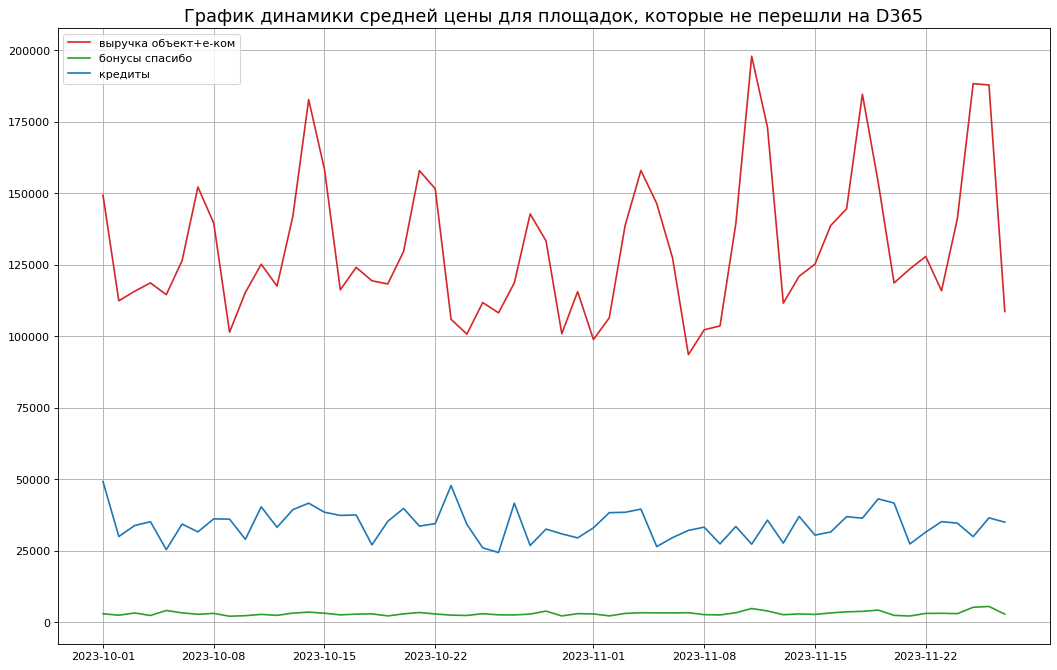

In [35]:
x = df_false1['Дата']
y = df_false1['Выручка объект\n+\nЕ-ком, руб']
y2 = df_false2['Бонусы Спасибо, руб']
y3 = df_false3['Факт продаж (чеки с кредитом POSCredit, Paylate, Мокка), руб.']
plt.figure(figsize=(16,10), dpi= 80)
plt.plot(x, y, color='tab:red', label='выручка объект+е-ком')
plt.plot(x, y2, color='tab:green', label='бонусы спасибо')
plt.plot(x, y3, color='tab:blue', label='кредиты')
plt.legend()
plt.title("График динамики средней цены для площадок, которые не перешли на D365", fontsize=16)
plt.grid(True)

In [36]:
df_true['Текущая дата'] = pd.to_datetime('2023-11-27')

In [37]:
df_true['Количество дней на D365'] = (df_true['Текущая дата'] - df_true['Дата перевода на D365']).dt.days + 1

In [38]:
objects = df_true['Код объекта'].unique().tolist()

In [39]:
object = []
values_b = []
values_a = []
credits_b = []
credits_a = []
spasibo_b = []
spasibo_a =[]

In [40]:
for i in objects:
    current = df_true[df_true['Код объекта'] == i]
    current_before = current[current['Дата'] < current['Дата перевода на D365']]
    current_after = current[current['Дата'] >= current['Дата перевода на D365']]

    mean_value_after = current_after['Выручка объект\n+\nЕ-ком, руб'].mean()
    mean_spasibo_after = current_after['Бонусы Спасибо, руб'].mean()
    mean_credit_after = current_after['Факт продаж (чеки с кредитом POSCredit, Paylate, Мокка), руб.'].mean()
    mean_value_before = current_before['Выручка объект\n+\nЕ-ком, руб'].mean()
    mean_spasibo_before = current_before['Бонусы Спасибо, руб'].mean()
    mean_credit_before = current_before['Факт продаж (чеки с кредитом POSCredit, Paylate, Мокка), руб.'].mean()

    object.append(i)
    values_b.append(mean_value_before)
    values_a.append(mean_value_after)
    credits_b.append(mean_credit_before)
    credits_a.append(mean_credit_after)
    spasibo_b.append(mean_spasibo_before)
    spasibo_a.append(mean_spasibo_after)

In [46]:
result = pd.DataFrame({'Код объекта': object, 'До перехода средняя выручка': values_b, 'До перехода средний кредит': credits_b, 'До перехода среднее спасибо': spasibo_b,
                       'После перехода средняя выручка': values_a, 'После перехода средний кредит': credits_a, 'После перехода среднее спасибо': spasibo_a})

In [47]:
result

,Код объекта,До перехода средняя выручка,До перехода средний кредит,До перехода среднее спасибо,После перехода средняя выручка,После перехода средний кредит,После перехода среднее спасибо
0,3-04-039,75918.315769,36707.000000,1860.500000,80372.100000,52800.0,NaN
1,3-04-046,45261.617857,35025.000000,2022.444444,51335.722667,18880.0,NaN
2,3-04-009,72493.421522,19936.666667,1312.450000,63956.625000,25500.0,NaN
3,3-04-048,79180.380192,35619.000000,2238.560250,63861.000000,NaN,NaN
4,3-04-041,75586.474737,19372.272727,1944.891220,119343.000000,NaN,NaN
...,...,...,...,...,...,...,...
665,1-01-166,94786.322826,29666.666667,4327.666667,105527.127500,NaN,NaN
666,1-02-011,65943.256410,11400.000000,2119.650294,79609.518947,23950.0,NaN
667,1-01-174,115117.980889,58673.000000,4970.225122,NaN,NaN,NaN
668,1-02-003,48442.162105,13911.428571,2376.159091,30481.000000,NaN,NaN


In [54]:
result = result.mean()

In [55]:
result

До перехода средняя выручка       108463.911596
До перехода средний кредит         31353.414509
До перехода среднее спасибо         2453.317140
После перехода средняя выручка    103185.890332
После перехода средний кредит      24726.489850
После перехода среднее спасибо      -872.216667
dtype: float64

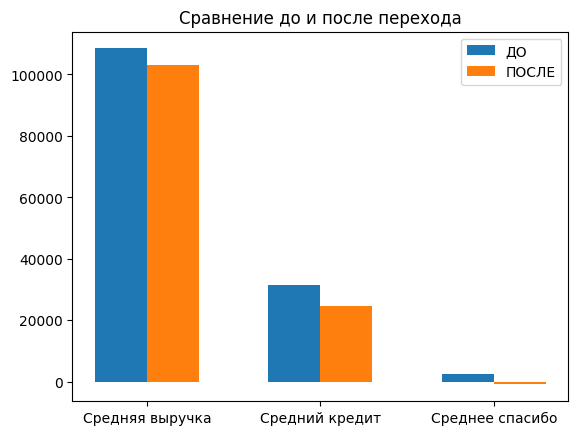

In [58]:
cat_par = ['Средняя выручка', 'Средний кредит', 'Среднее спасибо']
before = [108464, 31353, 2453] 
after = [103185, 24726, -872]
width = 0.3
x = np.arange(len(cat_par))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before, width, label='ДО')
rects2 = ax.bar(x + width/2, after, width, label='ПОСЛЕ')
ax.set_title('Сравнение до и после перехода')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

In [44]:
result = result.mean()

In [45]:
result.to_excel('result.xlsx')